In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from fastai import *
from fastai.vision import *

In [3]:
#checking the directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
        #print(dirname)

In [4]:
#checking path
base_path = Path(os.path.join("..", "input", "intel-image-classification"))
print(base_path.ls(),end="\n\n")

train_path = base_path/'seg_train'/'seg_train'
val_path = base_path/'seg_test'/'seg_test'
pred_path = base_path/'seg_pred'/'seg_pred'

[PosixPath('../input/intel-image-classification/seg_test'), PosixPath('../input/intel-image-classification/seg_pred'), PosixPath('../input/intel-image-classification/seg_train')]



In [5]:
#creating the databunch object. DataBunch is an API in the fastai which helps practitioners build data pipelines for the models. 
#Now, this API is subclassed into various specific databunch objects i.e ImageDataBunch works with data of the form of images.
data = ImageDataBunch.from_folder(path = base_path,
                                 train = 'seg_train',
                                 valid = 'seg_test',
                                 test = 'seg_pred',
                                 seed = 42,
                                 ds_tfms = get_transforms(),
                                 bs = 50,
                                 size = 150)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
sea,sea,sea,sea,sea
Path: ../input/intel-image-classification;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
sea,sea,sea,sea,sea
Path: ../input/intel-image-classification;

Test: LabelList (7301 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: EmptyLabelList
,,,,
Path: ../input/intel-image-classification

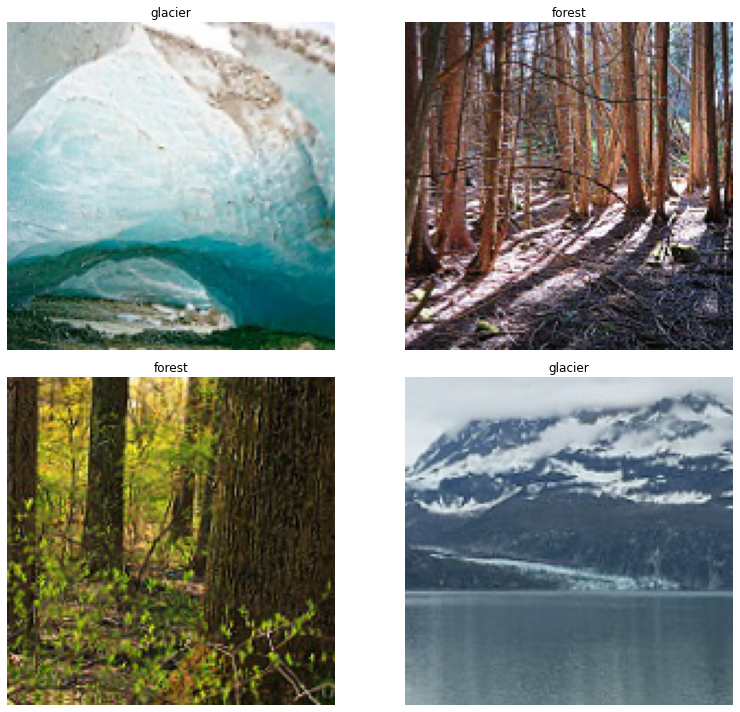

In [6]:
data.show_batch(rows = 2, figsize = (12,10))

In [7]:
#The cnn_learner is an API of the vision package that is used to build the learner object. 
learner = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])
learner.model_dir = "/kaggle/working/"

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
#single line of code for training
learner.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.559285,0.393728,0.872000,0.128000,01:26
1,0.424668,0.287592,0.899667,0.100333,01:14
2,0.332598,0.258581,0.905333,0.094667,01:13
3,0.283366,0.233109,0.916667,0.083333,01:12
4,0.234424,0.219814,0.921667,0.078333,01:11
5,0.222390,0.219971,0.919333,0.080667,01:14


In [9]:
learner.save('model1')

In [10]:
#ClassificationInterpretation API to perform analysis
interpret = ClassificationInterpretation.from_learner(learner)

In [11]:
#most_confused is used to identify the possible classes between which the model was 'most-confused'.
interpret.most_confused(min_val = 5)

[('glacier', 'mountain', 80),
 ('buildings', 'street', 54),
 ('mountain', 'glacier', 37),
 ('glacier', 'sea', 15),
 ('street', 'buildings', 14),
 ('mountain', 'sea', 8),
 ('sea', 'mountain', 6)]

In [12]:
learner.unfreeze()
learner.fit_one_cycle(6, max_lr = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.215975,0.218669,0.920333,0.079667,01:18
1,0.207994,0.202282,0.929000,0.071000,01:20
2,0.192145,0.194692,0.930333,0.069667,01:20
3,0.153579,0.181735,0.931333,0.068667,01:21
4,0.143419,0.183938,0.932667,0.067333,01:20
5,0.145121,0.177479,0.934333,0.065667,01:21


In [13]:
learner.save('model2')

In [14]:
interpret = ClassificationInterpretation.from_learner(learner)

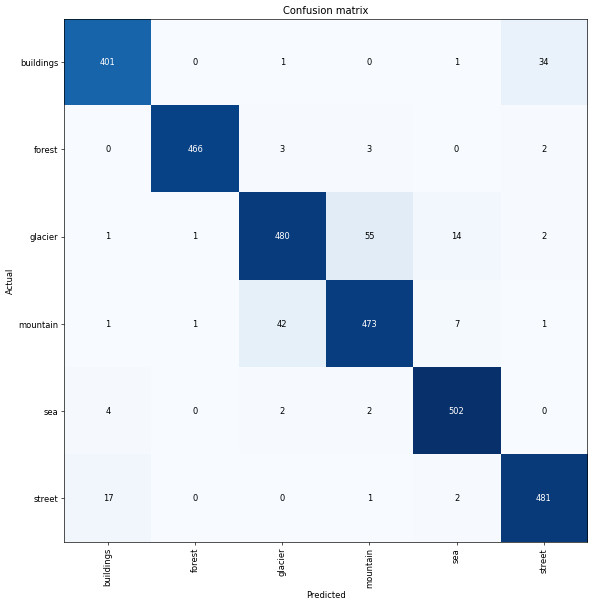

In [15]:
interpret.plot_confusion_matrix(figsize = (12,10), dpi = 60)

In [16]:
interpret.most_confused(5)

[('glacier', 'mountain', 55),
 ('mountain', 'glacier', 42),
 ('buildings', 'street', 34),
 ('street', 'buildings', 17),
 ('glacier', 'sea', 14),
 ('mountain', 'sea', 7)]